# Final Project: Thyroid Disease Diagnostics

>Names: Gabi Rivera, Joel Day, and Marvin Moran
>
>Date: 10/16/2023
>
>Course: ADS-505

# **Problem Statement & Justification**

## Problem Statement
Thyroid diseases such as hypothyroidism and hyperthyroidism pose a significant health concern globally, with their prevalence on the rise. Despite being among the most common hormone imbalance diseases, there is a notable absence of proactive research and diagnostic tools to assess individual risk levels for thyroid disorders. This gap in medical research and care hinders the ability to provide timely interventions and preventative measures, resulting in individuals often seeking medical attention only after experiencing symptoms or complications. Consequently, there is a pressing need for the development of a machine learning-based predictive tool that can assess an individual's risk for thyroid disorders, thereby enabling early intervention and personalized recommendations for healthcare.

## Justification
This type of project is supported by 5 key factors. First and foremost, the prevalance for the target disease type is on the rise. In turn, classifying its variant forms as a substantial public health concern. The prevalence of these conditions is observed not only across different age groups but also in both males and females. Thus, setting a presedence of high importance and substantial humanitarian benefit in return. Second, the proactive research for the target disease type is limited. Despite the growing incidence of thyroid diseases rising, there is a significant lack of proactive research in the field. Third, such a project can greatly highlight the potential machine learning has to offer. The field of data science can transform the field of medical research as it has done for numerous other professional fields. Fourth, the potential capabilties that will result from the project (e.g., automated diagnosis) offers tremendous business opportunities. From a business perspective, such a predictive tool can be monetized through various avenues, including advertising, pharmaceutical sales related to thyroid medication, and future contract opportunities. Fifth, and ultimately, the end-result of project has the potential to greatly improve the access to healthcare for individuals. By offering individuals an easy-to-use tool to self-assess their thyroid disorder risk, they can become convinced  to seek medical attention before symptoms worsen. This could lead to earlier diagnoses and more effective treatments, ultimately improving healthcare outcomes.

# **Dependencies + Data Prep**

## Import Packages

In [ ]:
# install libraries and packages
!pip install klib
!pip install GitPython
!pip install dython
!pip install kds
!pip install keras-sequential-ascii

import pandas as pd
import numpy as np
import git
import klib
import seaborn as sns
import matplotlib.pyplot as plt
import kds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import pydot
from tensorflow.keras.layers import Input, Dense
from keras_sequential_ascii import sequential_model_to_ascii_printout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotNormal
from keras.utils import to_categorical
import kds.metrics as metrics
from tensorflow.keras.callbacks import EarlyStopping

from dython.nominal import associations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# define function for connecting to GitHub repository
def download_github_repository(repo_url, destination_folder):
    try:
        git.Git(destination_folder).clone(repo_url)
        print(f"Repository successfully downloaded to {destination_folder}")
    except git.exc.GitCommandError as e:
        print(f"Error downloading the repository: {e}")

In [ ]:
# connect to GitHub repository
# Define repo owner (Gabby) the name of the repo, and where i want to save a copy of the repo to.
repo_owner = 'Riverag0011'
repo_name = 'ADS505_Team-4'
repository_url = f"https://github.com/{repo_owner}/{repo_name}"
destination_folder = "/content/sample_data"
download_github_repository(repository_url, destination_folder)

Error downloading the repository: Cmd('git') failed due to: exit code(128)
  cmdline: git clone https://github.com/Riverag0011/ADS505_Team-4
  stderr: 'fatal: destination path 'ADS505_Team-4' already exists and is not an empty directory.'


## Import Dataset

In [ ]:
# import data and preview headers
# csv name within the copied repo
csv_name = 'thyroidDF'
# read the csv into a pandas df
df = pd.read_csv('/content/sample_data/ADS505_Team-4/Raw Data/thyroidDF.csv')
# remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')
display(df.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## Identify Missing Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

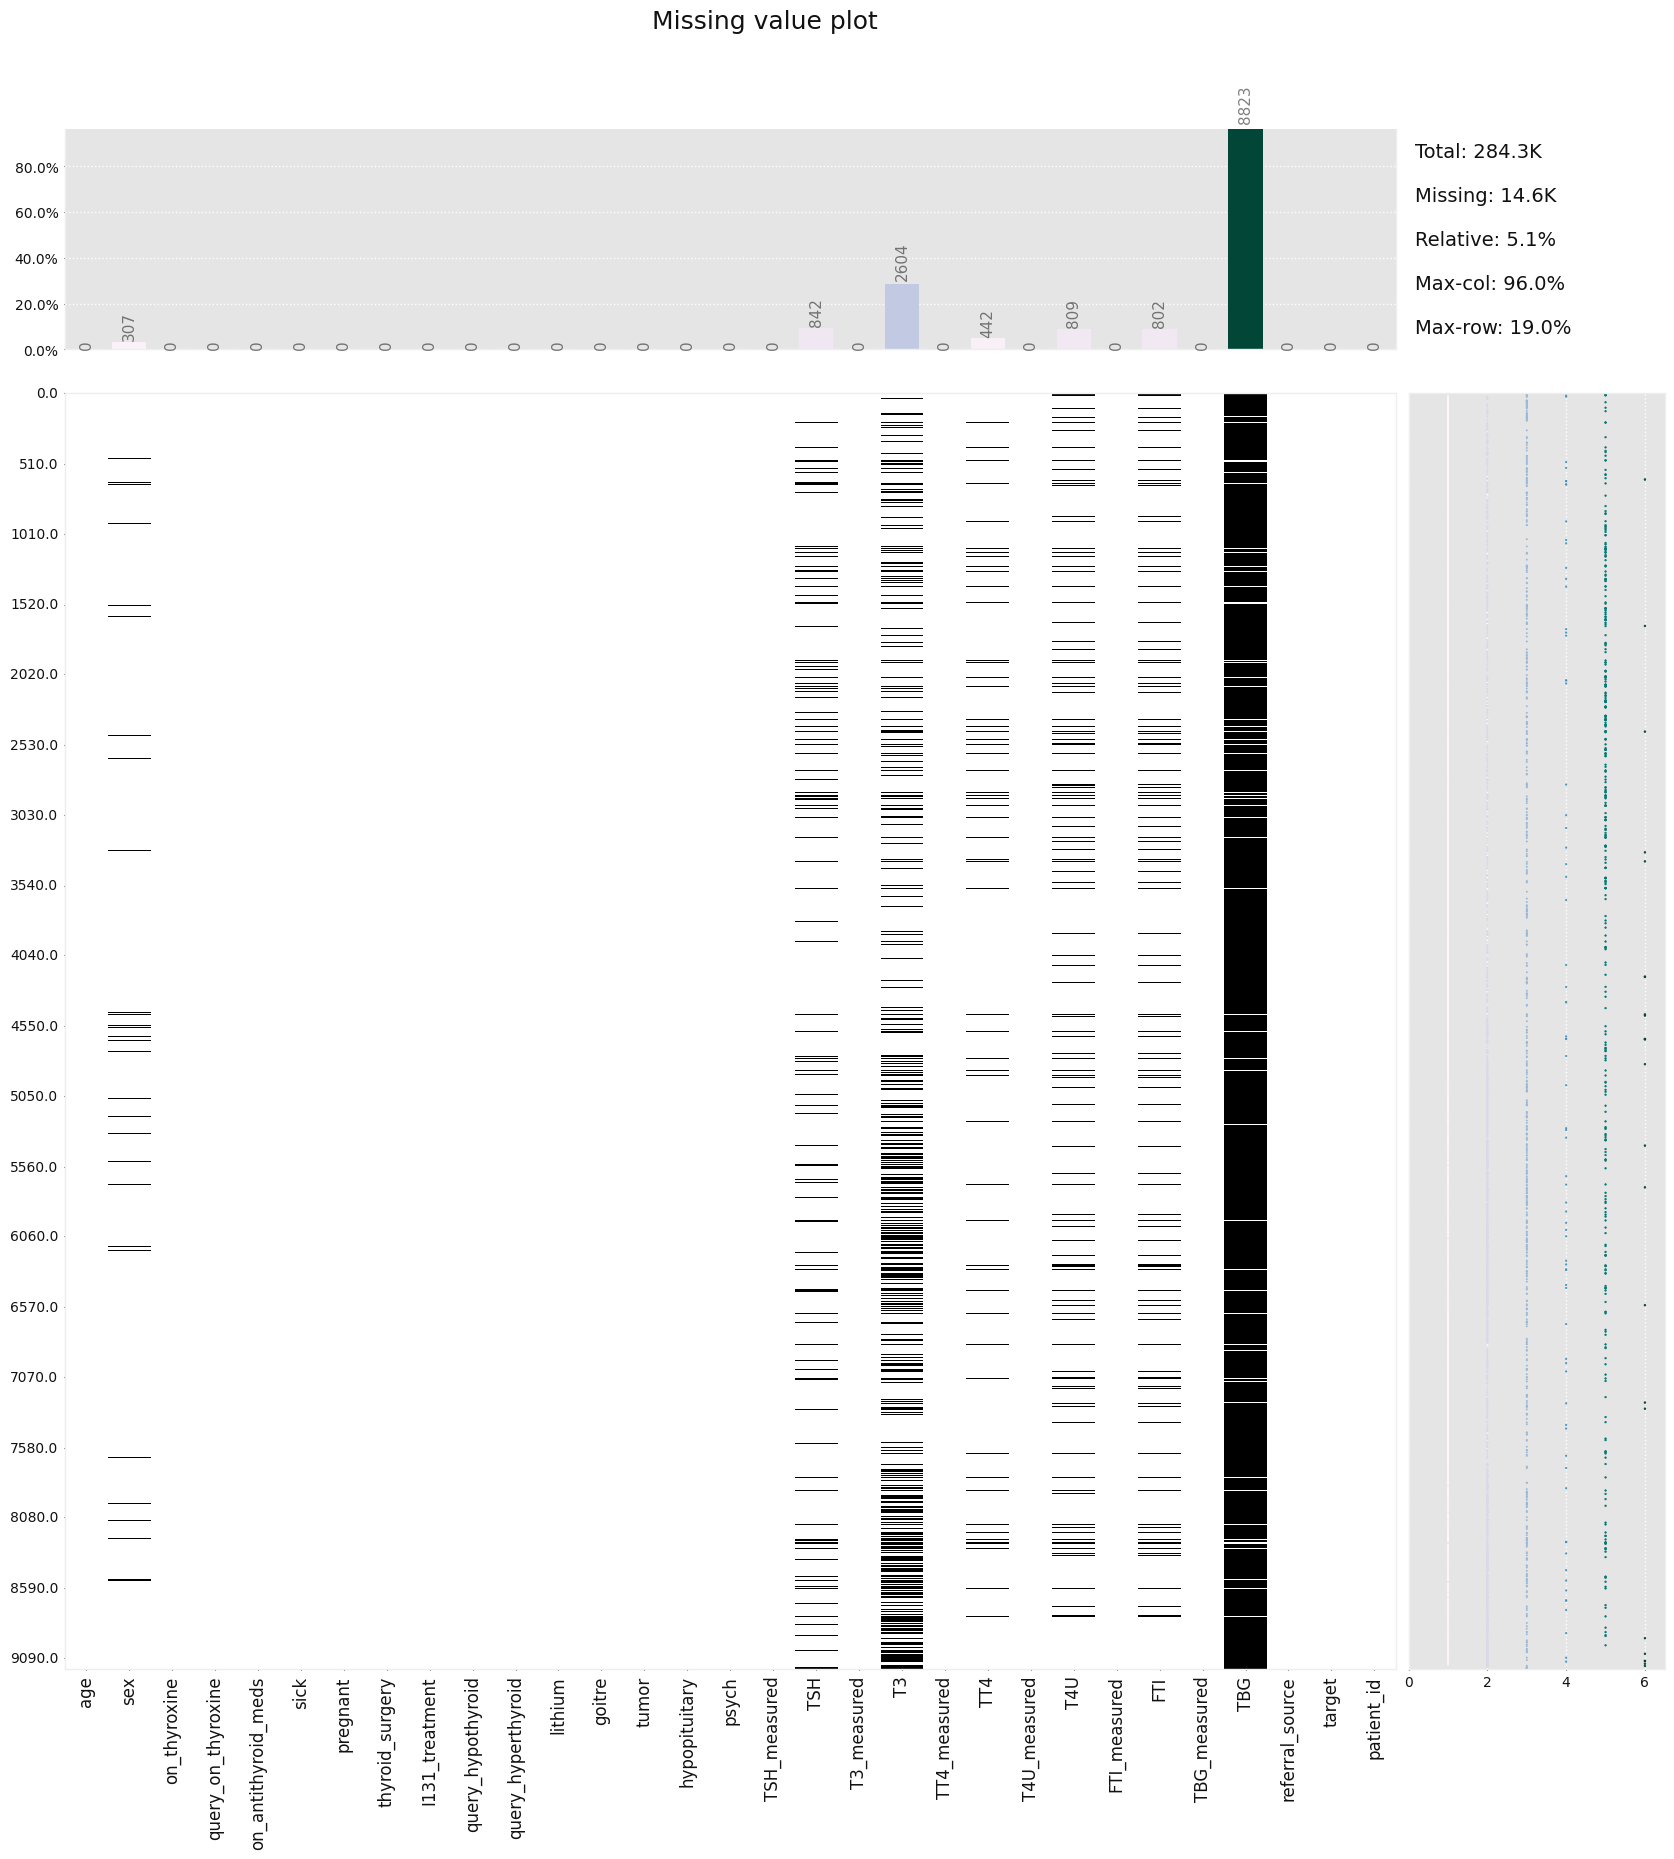

In [ ]:
# Identify missing value frequencies:
display(df.info())
df.replace('', np.nan, inplace=True) #replace blanks with np.nan
display(klib.missingval_plot(df))

<Axes: xlabel='age', ylabel='Density'>

GridSpec(6, 23)

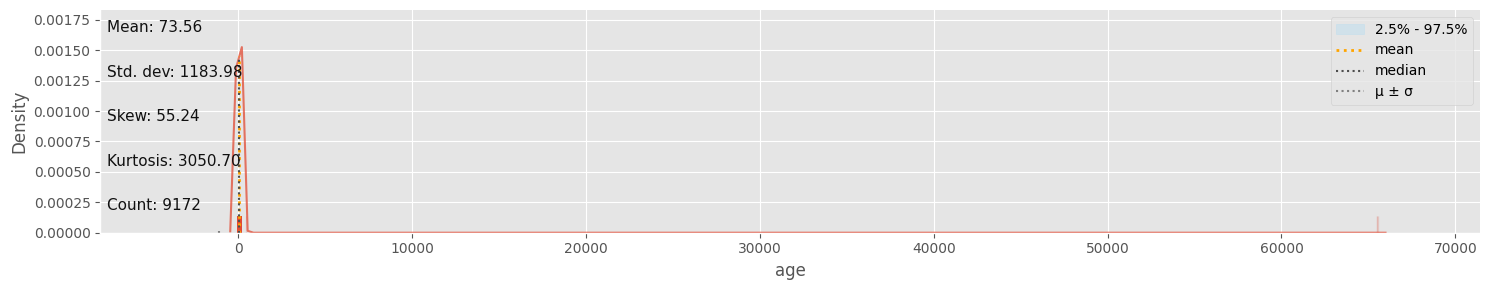

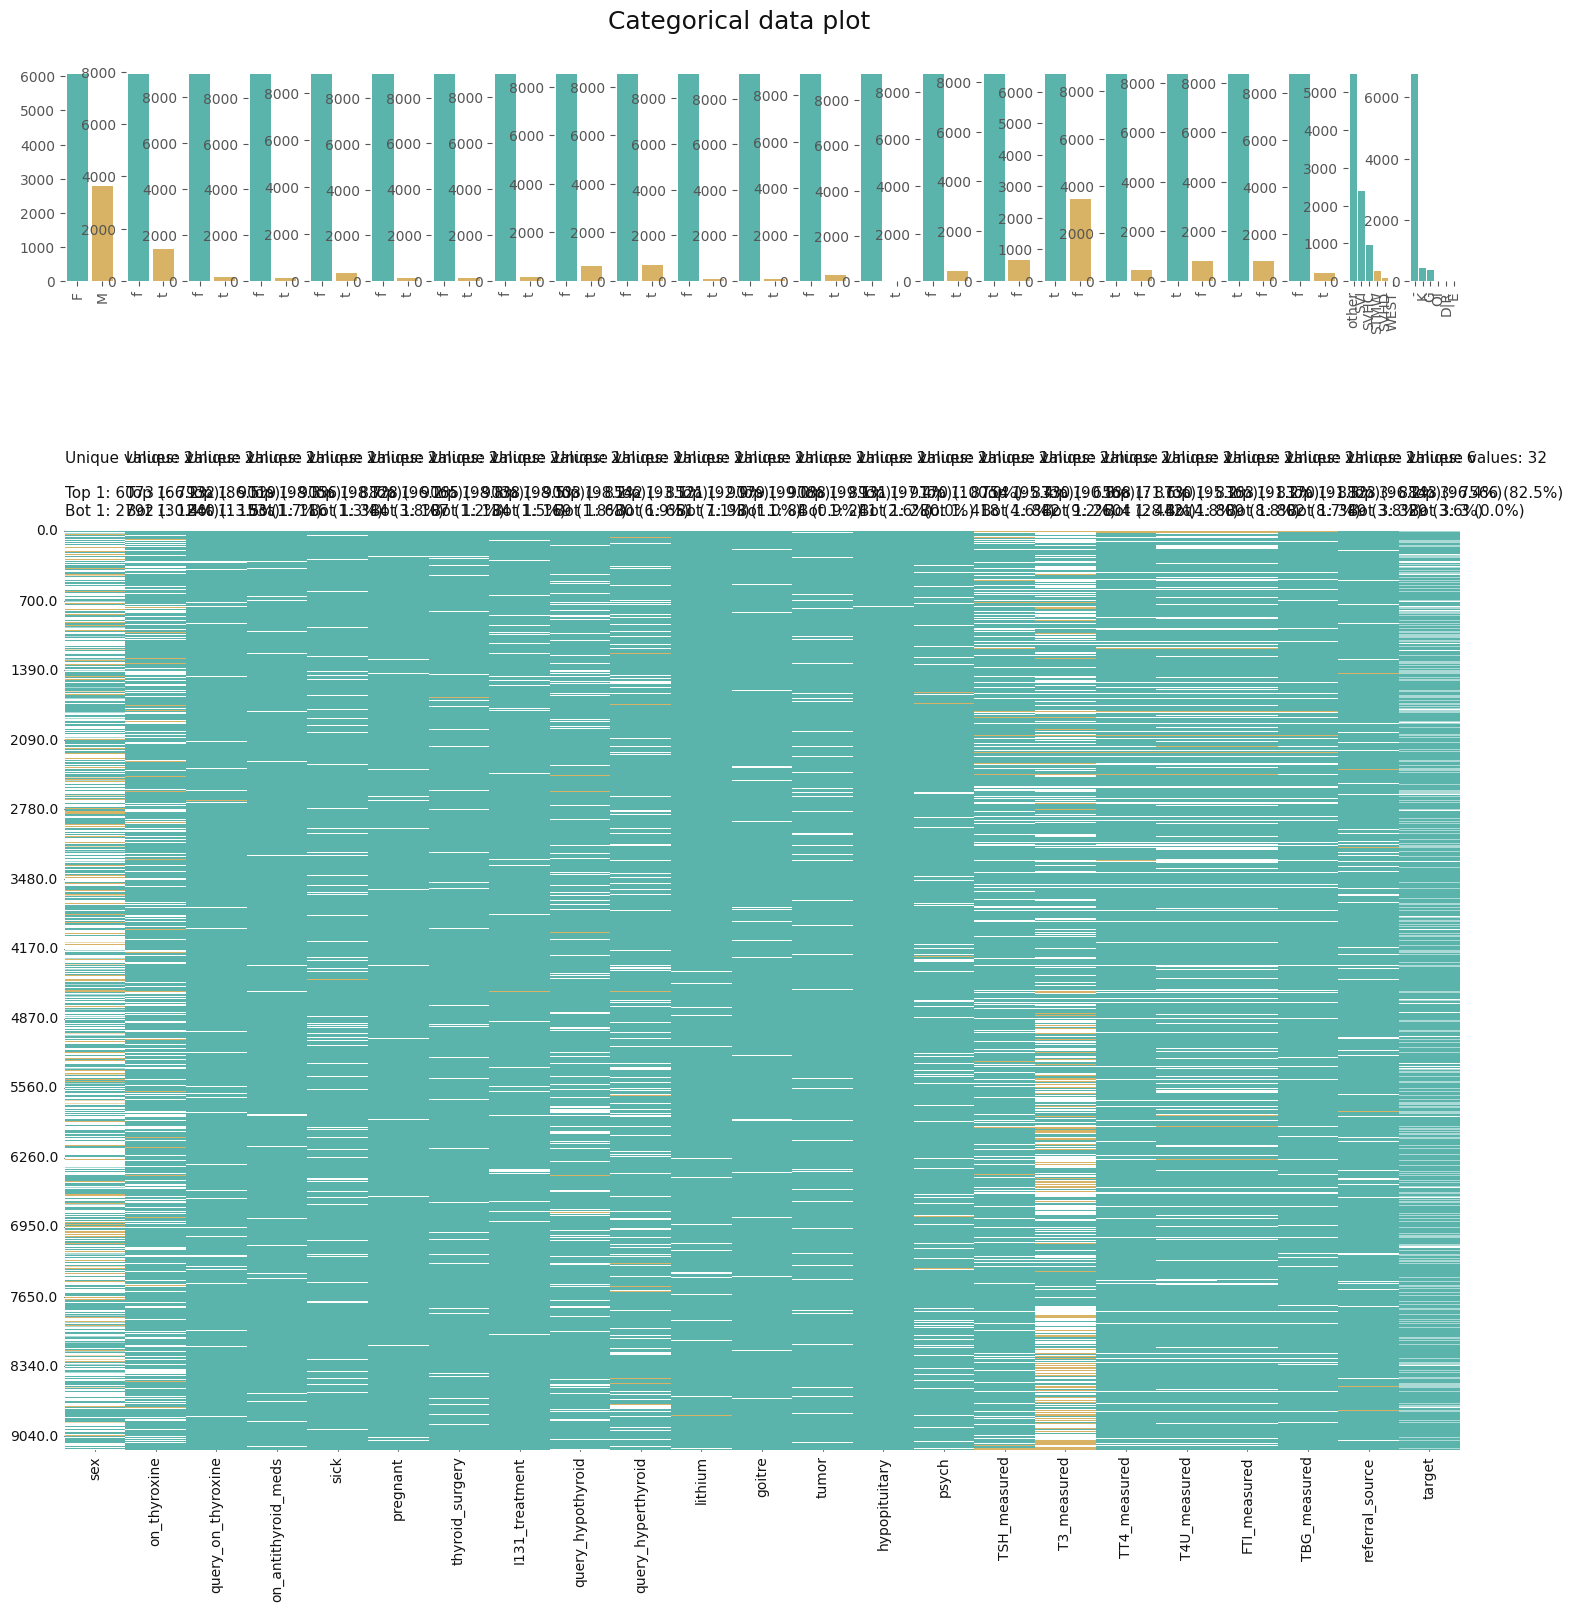

In [ ]:
# Visualize distributions of numeric and categorical attributes:
display(klib.dist_plot(df))
display(klib.cat_plot(df))

In [ ]:
# Obtain Measure of Centrality:
display(df.describe())
display(df['sex'].mode())
display(df['TSH'].mode())
display(df['T3'].mode())
display(df['TT4'].mode())
display(df['T4U'].mode())
display(df['FTI'].mode())

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000,9.172000e+03
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057,8.529473e+08
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504,7.581969e+06
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000,8.408010e+08
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000,8.504090e+08
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000,8.510040e+08
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000,8.607110e+08
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


0    F
Name: sex, dtype: object

0    0.1
Name: TSH, dtype: float64

0    1.8
1    2.0
Name: T3, dtype: float64

0    101.0
Name: TT4, dtype: float64

0    0.96
Name: T4U, dtype: float64

0    107.0
Name: FTI, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

GridSpec(6, 6)

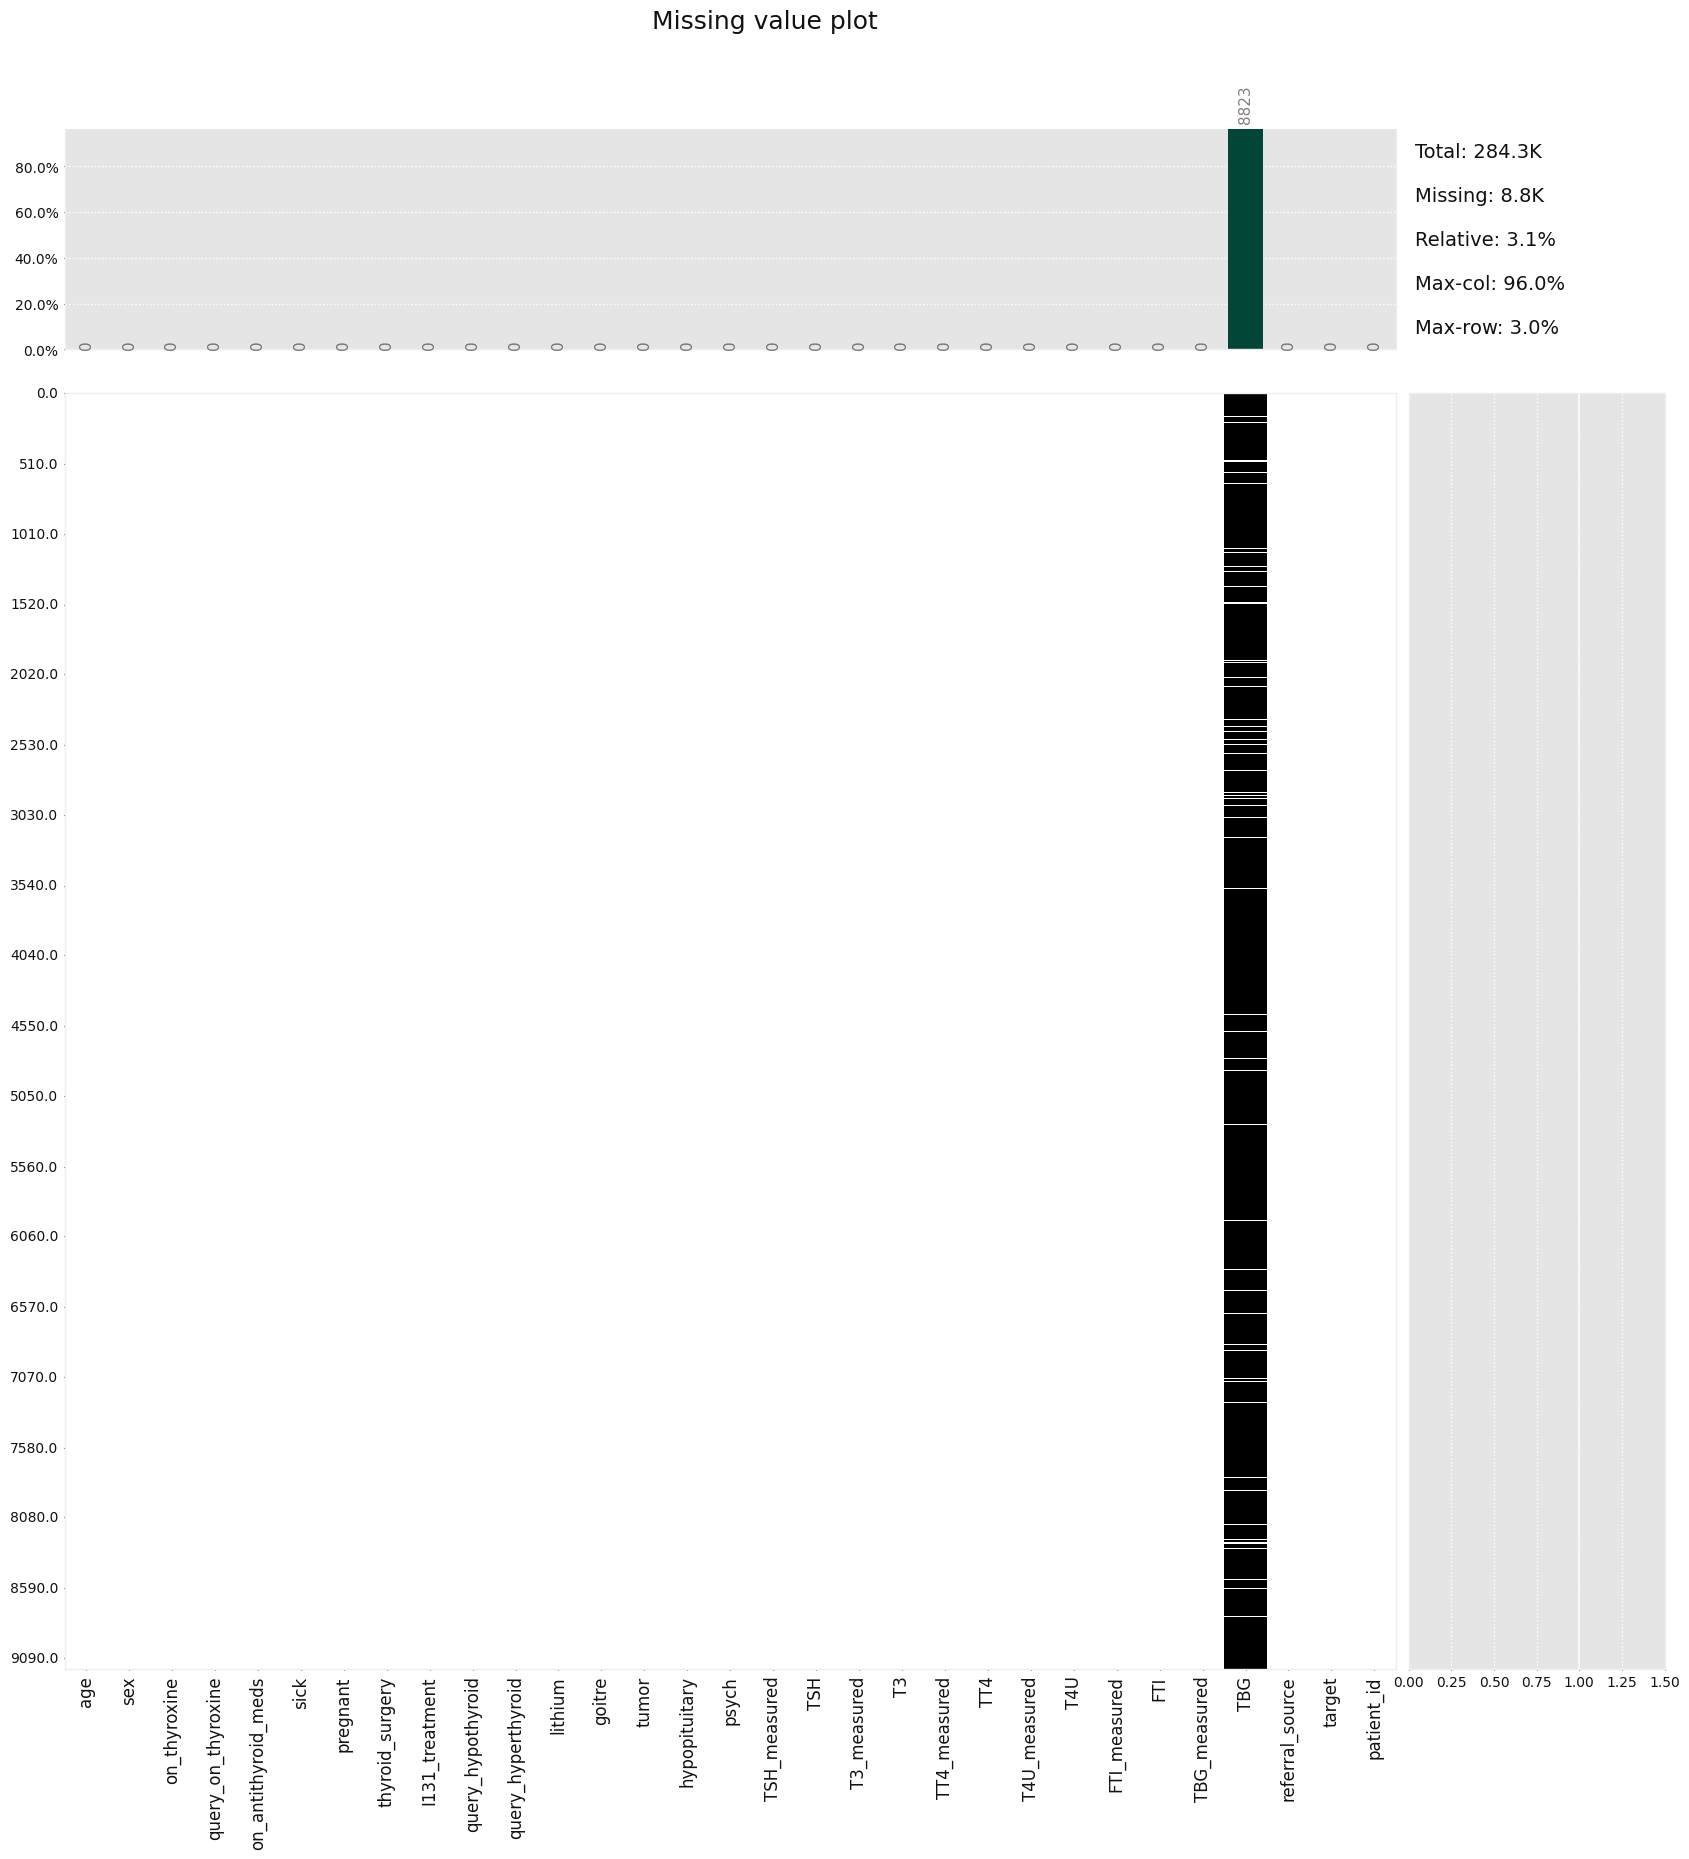

In [ ]:
# Replace attribute having <= 40% missing data with appropriate measurement of centrality:
# TBG with >= 80% will be removed later
df['sex'] = df['sex'].replace(np.nan, 'F', regex = True) #Mode
df['TSH'] = df['TSH'].replace(np.nan, '1.4', regex = True) #Median
df['T3'] = df['T3'].replace(np.nan, '1.9', regex = True) #Median
df['TT4'] = df['TT4'].replace(np.nan, '101.0', regex = True) #Mode
df['T4U'] = df['T4U'].replace(np.nan, '0.96', regex = True) #Median
df['FTI'] = df['FTI'].replace(np.nan, '107.0', regex = True) #Median

display(df.info())
display(klib.missingval_plot(df))

In [ ]:
# Correct numerical attribute's datatype back to float
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)
df['T4U'] = df['T4U'].astype(float)
df['FTI'] = df['FTI'].astype(float)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  9172 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

None

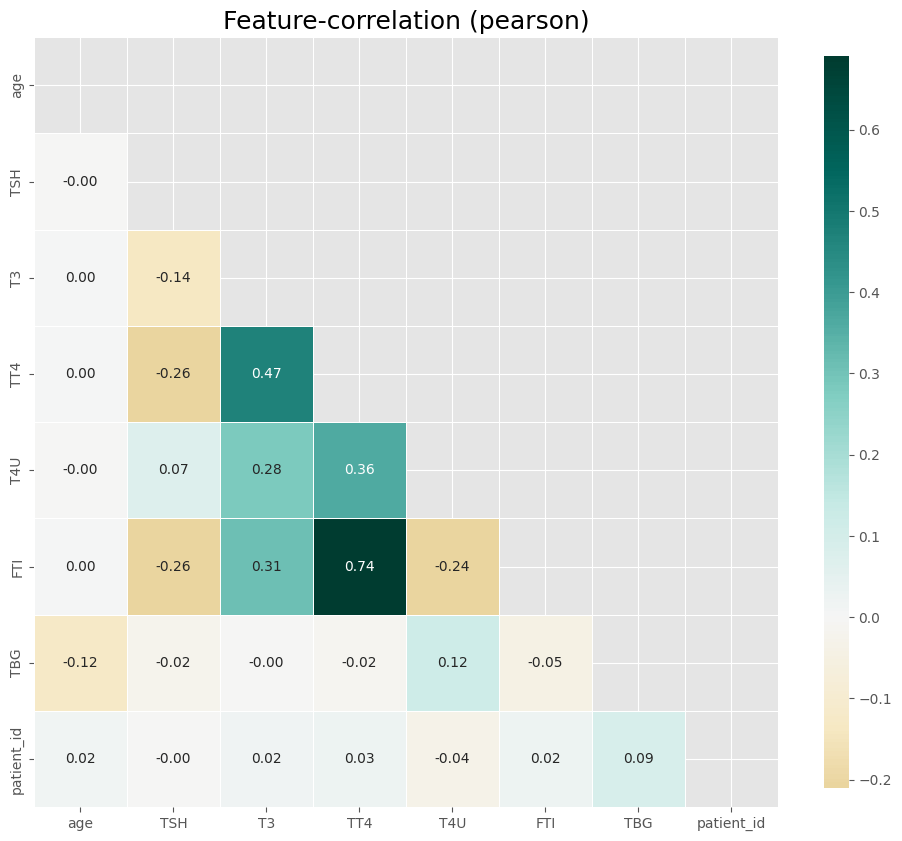

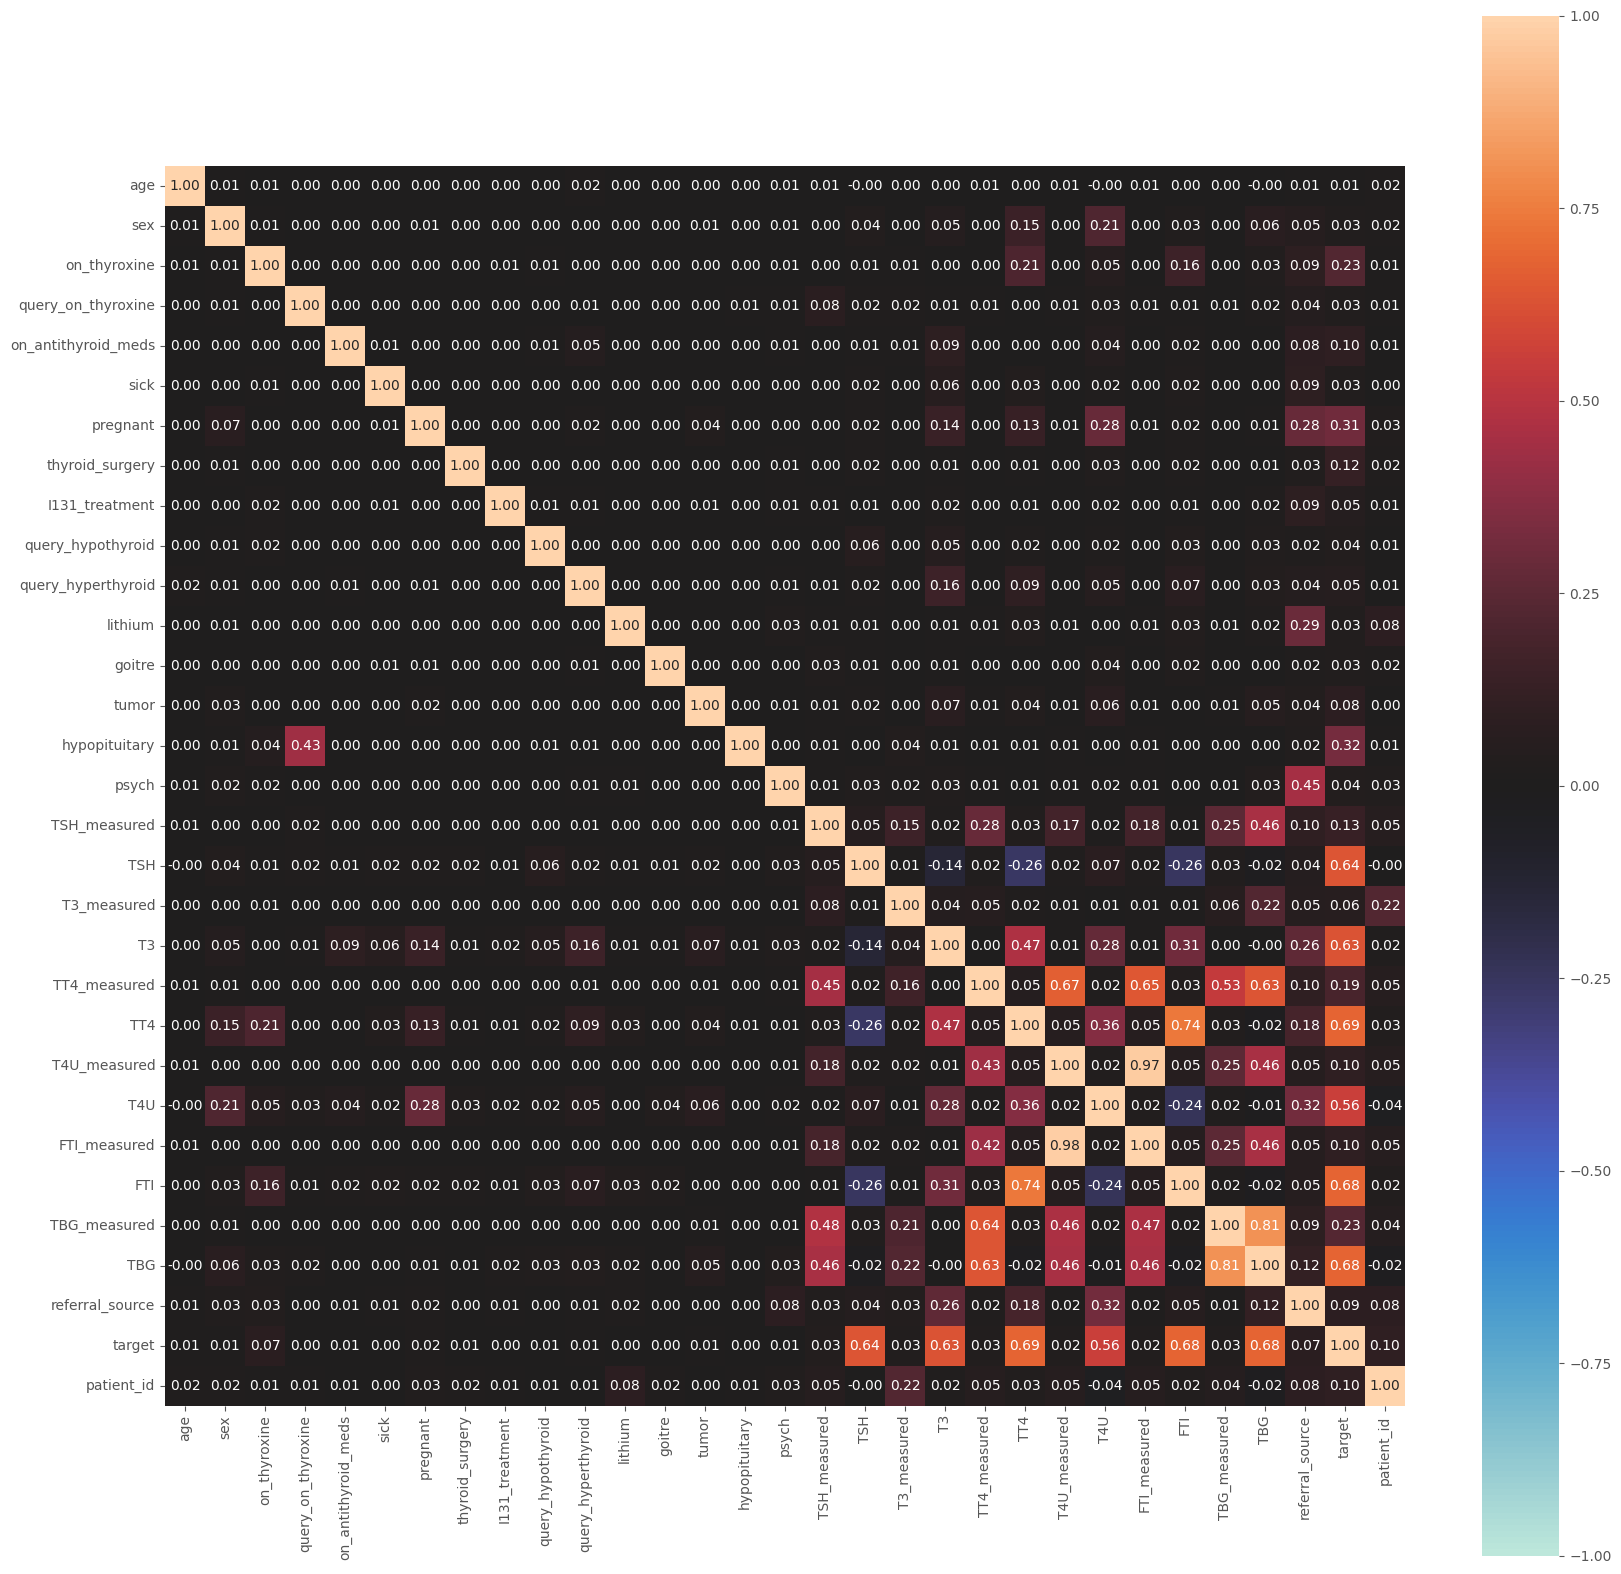

{'corr':                           age       sex  on_thyroxine  query_on_thyroxine  \
 age                  1.000000  0.014178      0.007095            0.002530   
 sex                  0.014178  1.000000      0.008941            0.001546   
 on_thyroxine         0.007095  0.013871      1.000000            0.000082   
 query_on_thyroxine   0.002530  0.011199      0.000385            1.000000   
 on_antithyroid_meds  0.002831  0.004556      0.000874            0.003156   
 sick                 0.002415  0.000255      0.008955            0.000211   
 pregnant             0.003892  0.067135      0.000815            0.001807   
 thyroid_surgery      0.002631  0.011320      0.002001            0.000175   
 I131_treatment       0.001645  0.000511      0.021638            0.003406   
 query_hypothyroid    0.004266  0.010997      0.020558            0.000538   
 query_hyperthyroid   0.017798  0.008833      0.002046            0.002474   
 lithium              0.002361  0.007453      0.000230  

In [ ]:
# Correlation matrix for continues features:
klib.corr_plot(df)

# Correlation matric for categorical features:
# Dython library calculates correlation between categorical variables. Method applied is Theil U.
associations(df, nom_nom_assoc = "theil", multiprocessing = True, figsize = (20,20))

In [ ]:
# Drop columns that have 80% missing values.
# 'TBG', 'TBG_measured'
# Drop columns that involve the opinion of the patient (queries).
# 'query_hypothyroid', 'query_hyperthyroid'
# Drop columns that are irrelevant to the issue.
#'patient_id', 'referral_source'
# Additionally, the correlation plot above uncovered that T4U_measured and FTI_measured are highly correlated - so lets drop one at random ('T4U_measured').
df = df.drop(['TBG', 'TBG_measured', 'query_hypothyroid',
              'query_hyperthyroid', 'patient_id',
              'referral_source', 'T4U_measured'], axis = 1)

In [ ]:
# Final check for missing values:
# create a df that shows Missing vlues as an amount, pecent and then shows the data types.
percent = round(df.isna().sum()/df.shape[0]*100, 1)
sum = df.isna().sum()
dtype = df.dtypes
na = pd.DataFrame({'% N/A': percent, '# N/A': sum, 'Datatype': dtype})
na

,% N/A,# N/A,Datatype
age,0.0,0,int64
sex,0.0,0,object
on_thyroxine,0.0,0,object
query_on_thyroxine,0.0,0,object
on_antithyroid_meds,0.0,0,object
sick,0.0,0,object
pregnant,0.0,0,object
thyroid_surgery,0.0,0,object
I131_treatment,0.0,0,object
lithium,0.0,0,object


## Target Variable Transformation

In [ ]:
# Replace target classes "-" to healthy:
df.loc[df["target"] == "-", "target"] = 'HLT'

# Combine appropriate target classes to identify hyperthyrodism:
df.loc[df["target"] == "A", "target"] = 'HeC'
df.loc[df["target"] == "B", "target"] = 'HeC'
df.loc[df["target"] == "C", "target"] = 'HeC'
df.loc[df["target"] == "D", "target"] = 'HeC'
df.loc[df["target"] == "D|R", "target"] = 'HeC'
df.loc[df["target"] == "AK", "target"] = 'HeC'
df.loc[df["target"] == "T", "target"] = 'HeC'
df.loc[df["target"] == "O", "target"] = 'HeC'
df.loc[df["target"] == "P", "target"] = 'HeC'
df.loc[df["target"] == "Q", "target"] = 'HeC'
df.loc[df["target"] == "J", "target"] = 'HeC'
df.loc[df["target"] == "LJ", "target"] = 'HeC'
df.loc[df["target"] == "KJ", "target"] = 'HeC'

# These classes were classified using EDA plot TT4 vs T4U:
df.loc[df["target"] == "L", "target"] = 'HeC'
df.loc[df["target"] == "M", "target"] = 'HeC'
df.loc[df["target"] == "MK", "target"] = 'HeC'
df.loc[df["target"] == "N", "target"] = 'HeC'

# Combine appropriate target classes to identify hypothyrodism:
df.loc[df["target"] == "E", "target"] = 'HoC'
df.loc[df["target"] == "F", "target"] = 'HoC'
df.loc[df["target"] == "FK", "target"] = 'HoC'
df.loc[df["target"] == "G", "target"] = 'HoC'
df.loc[df["target"] == "GKJ", "target"] = 'HoC'
df.loc[df["target"] == "GI", "target"] = 'HoC'
df.loc[df["target"] == "GK", "target"] = 'HoC'
df.loc[df["target"] == "H", "target"] = 'HoC'
df.loc[df["target"] == "H|K", "target"] = 'HoC'
df.loc[df["target"] == "S", "target"] = 'HoC'
df.loc[df["target"] == "I", "target"] = 'HoC'
df.loc[df["target"] == "OI", "target"] = 'HoC'
df.loc[df["target"] == "MI", "target"] = 'HoC'
df.loc[df["target"] == "C|I", "target"] = 'HoC'

# Create others bucket:
df.loc[df["target"] == "K", "target"] = 'Others'
df.loc[df["target"] == "R", "target"] = 'Others'

display(df['target'].unique)

<bound method Series.unique of 0       HLT
1       HLT
2       HLT
3       HLT
4       HoC
       ... 
9167    HLT
9168    HLT
9169    HoC
9170    HLT
9171    HLT
Name: target, Length: 9172, dtype: object>



```
# This is formatted as code
```

# **Exploratory Data Analysis**

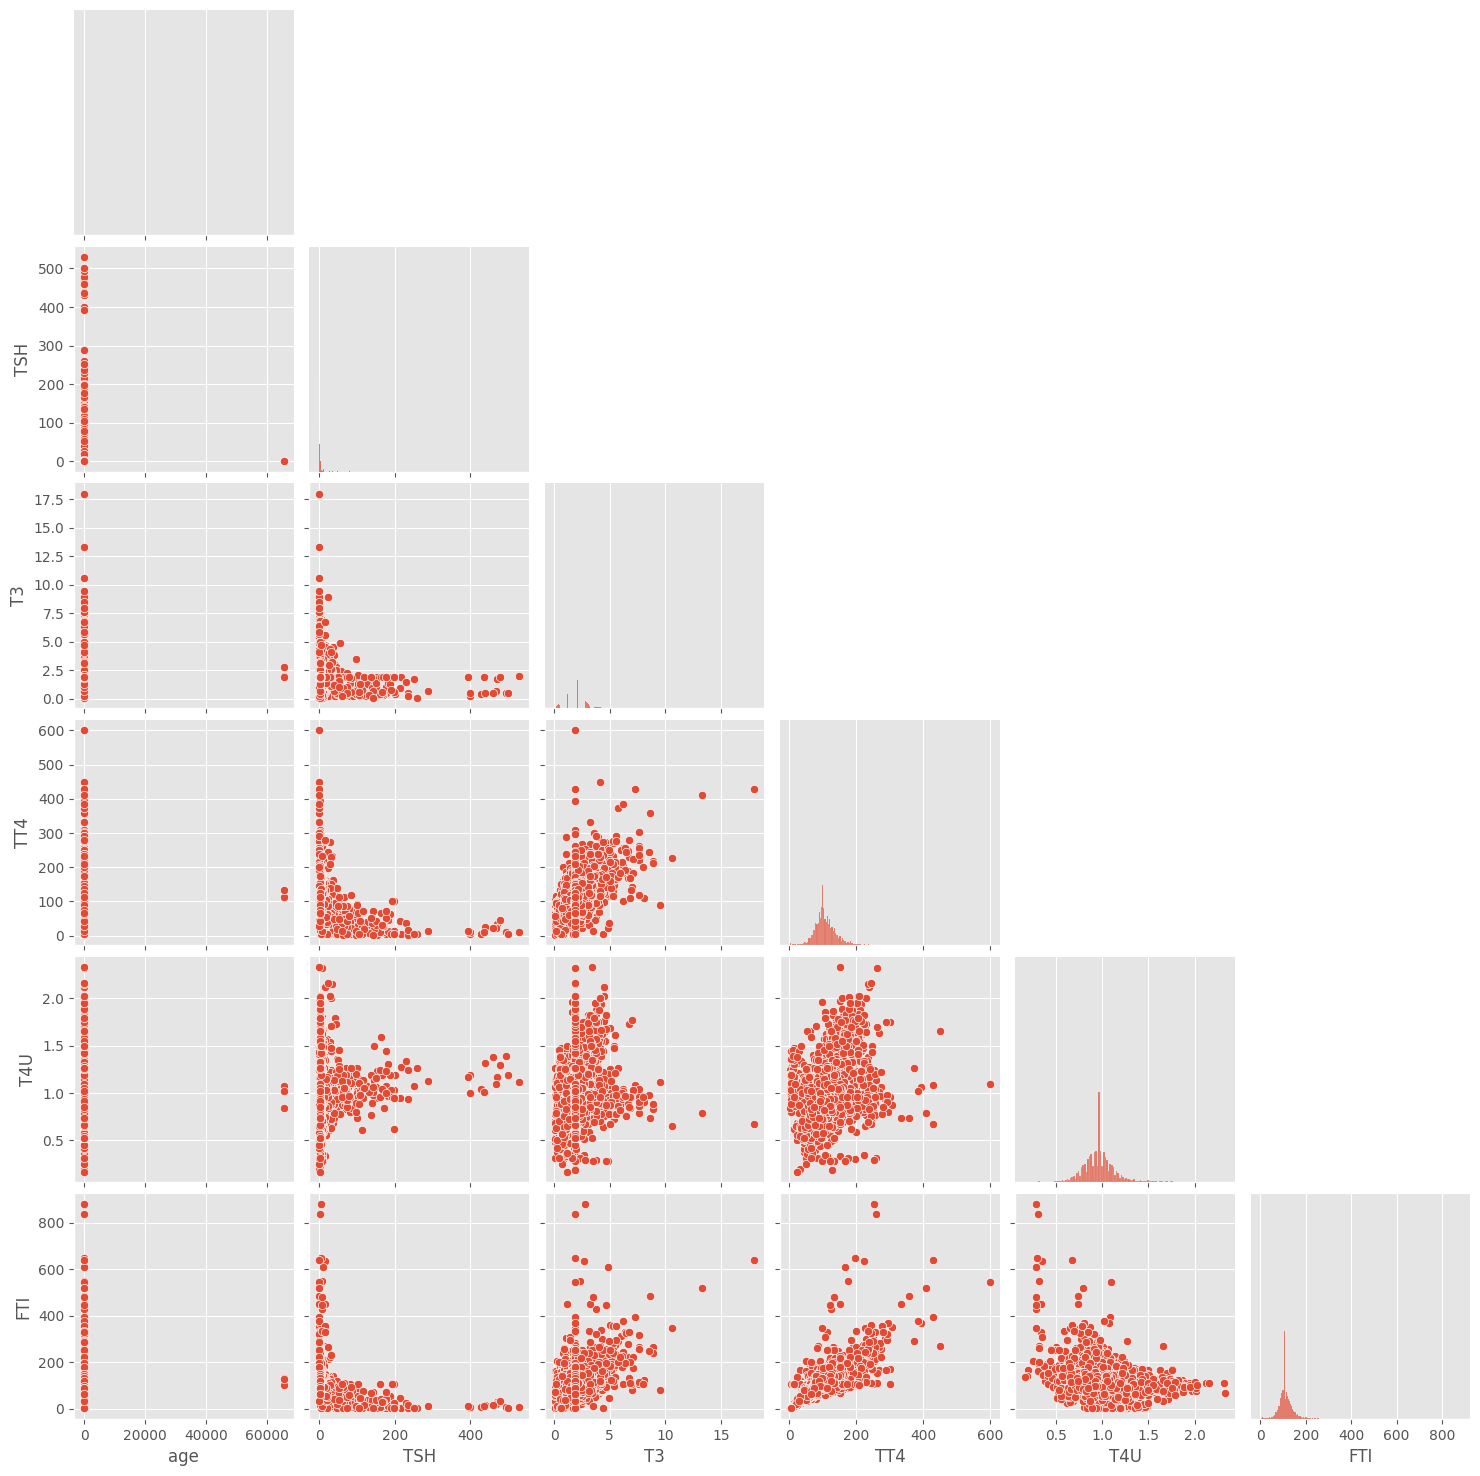

In [ ]:
# General Pairplot of continues attributes:
# This plot was used to find a plot of analytes with a fairly spread-out population for target transformation:
sns.pairplot(df, corner=True)

Text(0.5, 1.0, 'Target Frequencies by Gender')

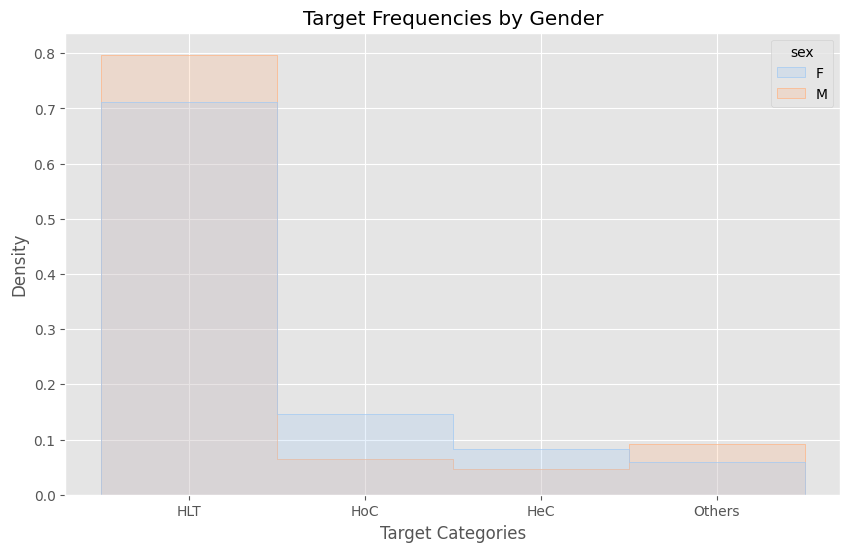

In [ ]:
### Target Frequencies by Gender:
sns.histplot(data=df, x="target", hue="sex", stat="density",
             element="step", palette = "pastel",
             common_norm=False)

plt.gcf().set_size_inches(10, 6)
plt.xlabel('Target Categories')
plt.ylabel('Density')
plt.title("Target Frequencies by Gender")

Text(0.5, 1.0, 'TT4 Relation to T4U Differentiated by target')

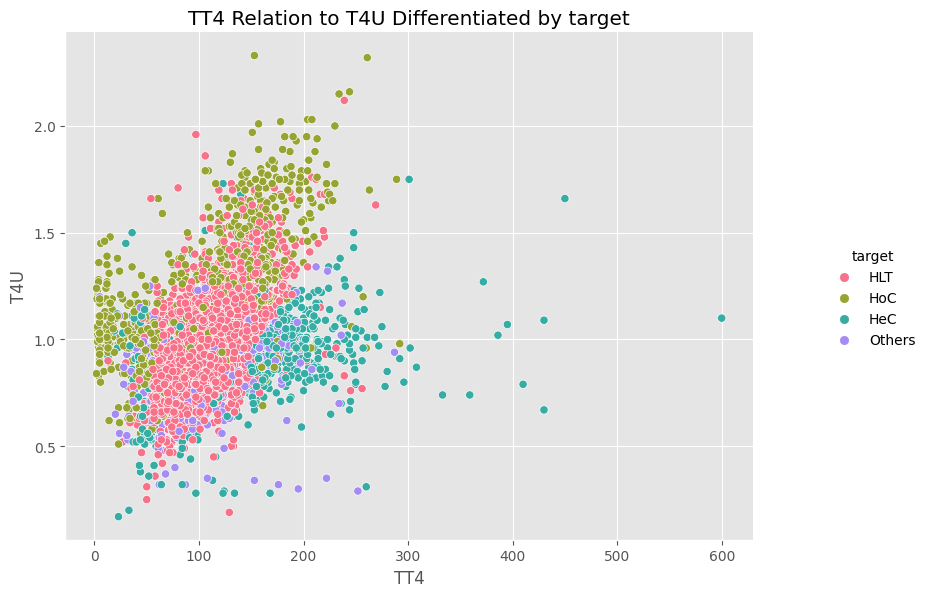

In [ ]:
# TT4 Relation to T4U Differentiated by target:
# Plot used to categorize the different classes of the Target variable to either Hyper-, Hypo-, & others.
sns.relplot(data=df, x="TT4", y="T4U", hue="target", palette = "husl",
           kind="scatter")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('TT4')
plt.ylabel('T4U')
plt.title("TT4 Relation to T4U Differentiated by target")

Text(0.5, 1.0, 'TSH Relation to target by Gender')

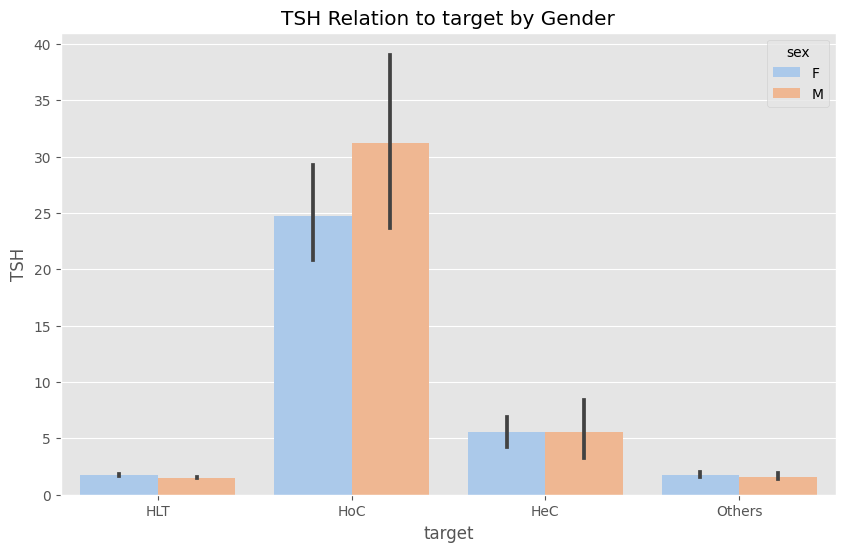

In [ ]:
# TSH Relation to target by Gender
sns.barplot(data=df, x="target", y="TSH", hue="sex", palette = "pastel")
plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TSH')
plt.title("TSH Relation to target by Gender")

Text(0.5, 1.0, 'TT4 Relation to target by Gender')

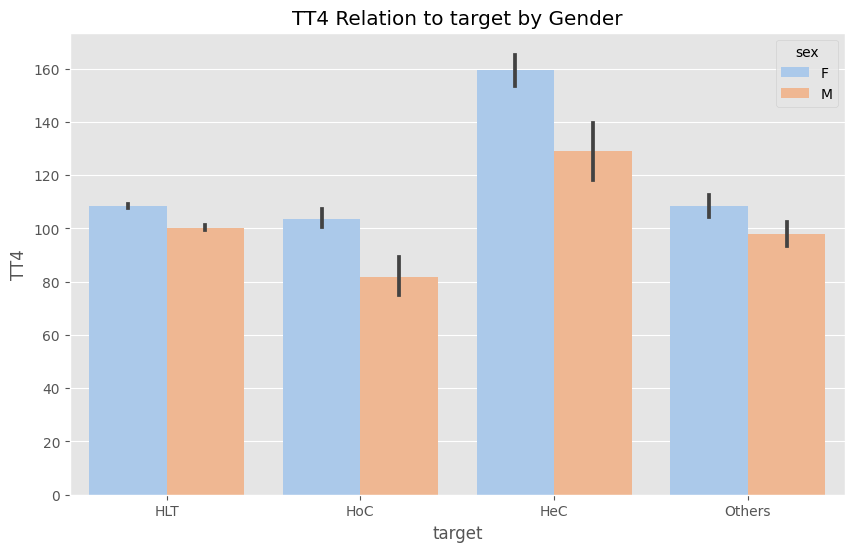

In [ ]:
# TT4 Relation to target by Gender
sns.barplot(data=df, x="target", y="TT4", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('TT4')
plt.title("TT4 Relation to target by Gender")

Text(0.5, 1.0, 'T4U Relation to target by Gender')

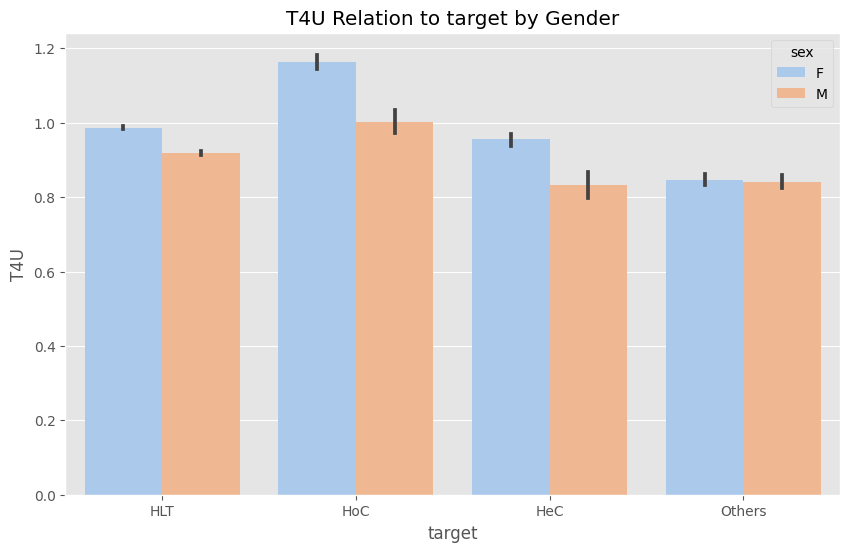

In [ ]:
# T4U Relation to target by Gender
sns.barplot(data=df, x="target", y="T4U", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('T4U')
plt.title("T4U Relation to target by Gender")

Text(0.5, 1.0, 'FTI Relation to target by Gender')

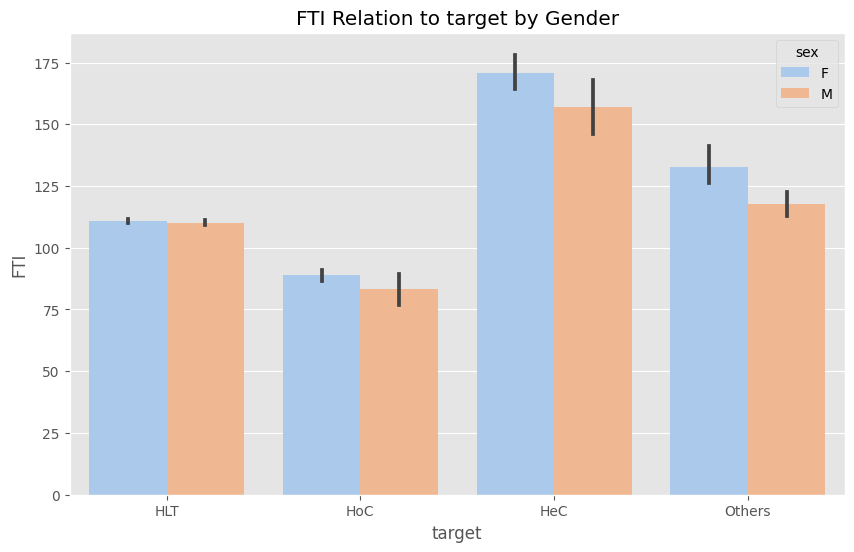

In [ ]:
# FTI Relation to target by Gender
sns.barplot(data=df, x="target", y="FTI", hue="sex", palette = "pastel")

plt.gcf().set_size_inches(10, 6)
plt.xlabel('target')
plt.ylabel('FTI')
plt.title("FTI Relation to target by Gender")

# **Data Transformation**

## Variables Transformation

In [ ]:
# change age to float because it is continuous
df['age'] = df['age'].astype(float)
# scale using Standard Scaler():
# this scales based on a normal distrobution
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])

In [ ]:
# 'sex' should be an int with only 0's and 1's
display(df['sex'].value_counts())
# Use Label encoder to convert the data values
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['sex'].value_counts()

F    6380
M    2792
Name: sex, dtype: int64

0    6380
1    2792
Name: sex, dtype: int64

In [ ]:
# lets transform the rest of the boolean features in the same manner as we did for sex
# they are all currently objects so lets retrieve them this way and transform them all with the label encoder in a similar manner to 'sex'
display("On Thyroxine:", df['on_thyroxine'].value_counts())
dtype_obj = df.select_dtypes(include=['object']).columns.tolist()
# loop through each column to use Label Encoder to convert to int
for col in dtype_obj:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
# loop through each column to show that the transformation was successful
for col in dtype_obj:
    x = df[col].value_counts()
    print(x)

'On Thyroxine:'

f    7932
t    1240
Name: on_thyroxine, dtype: int64

0    7932
1    1240
Name: on_thyroxine, dtype: int64
0    9019
1     153
Name: query_on_thyroxine, dtype: int64
0    9056
1     116
Name: on_antithyroid_meds, dtype: int64
0    8828
1     344
Name: sick, dtype: int64
0    9065
1     107
Name: pregnant, dtype: int64
0    9038
1     134
Name: thyroid_surgery, dtype: int64
0    9003
1     169
Name: I131_treatment, dtype: int64
0    9079
1      93
Name: lithium, dtype: int64
0    9088
1      84
Name: goitre, dtype: int64
0    8931
1     241
Name: tumor, dtype: int64
0    9170
1       2
Name: hypopituitary, dtype: int64
0    8754
1     418
Name: psych, dtype: int64
1    8330
0     842
Name: TSH_measured, dtype: int64
1    6568
0    2604
Name: T3_measured, dtype: int64
1    8730
0     442
Name: TT4_measured, dtype: int64
1    8370
0     802
Name: FTI_measured, dtype: int64
0    6771
2    1113
1     656
3     632
Name: target, dtype: int64


## Drop Redundant Attributes

In [ ]:
# drop redundant columns
# the columns including 'measured' were dropped because they are the boolean data type representing the same information as the float values. Meaning these columns are less informative
columns_to_drop = ['TSH_measured', 'T3_measured', 'TT4_measured', 'FTI_measured']
df= df.drop(columns=columns_to_drop).copy()

## Final Dataframe

In [ ]:
# final dataframe post preparation + transformation
# show the datafame after transformations
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,-0.037634,0,0,0,0,0,0,0,0,0,0,0,0,0,0.3,1.9,101.0,0.96,107.0,0
1,-0.037634,0,0,0,0,0,0,0,0,0,0,0,0,0,1.6,1.9,128.0,0.96,107.0,0
2,-0.027499,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,0
3,-0.031722,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,0
4,-0.035100,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,101.0,0.96,107.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,-0.014829,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,64.0,0.83,77.0,0
9168,-0.043547,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,91.0,0.92,99.0,0
9169,-0.003848,1,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,113.0,1.27,89.0,2
9170,-0.022431,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,1.9,75.0,0.85,88.0,0


# **Partition Dataset to Train Set and Validation Set**

The training set will be used to train the model, the validation set will be used along with cross validation to find the optimal hyperparameter and avoid data leakage that would be caused if the testing set is used. The testing set is used to measure the performance of the model and gauge if it is ready for deployment.

In [ ]:
# identify target variable (y) and predictor variables (X)
y = df['target']
y
# remove the taret variable column to prevent data leakage and aid modeling
X = df.drop(['target'], axis = 1)
X.shape

(9172, 19)

In [ ]:
# set random seed + partition data into 40% train, 30% validation, and 30% test
np.random.seed(22)
# create training sets
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.4)
# split the remaining rows into the validation and testing sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, train_size=.5)
print("X_train shape:", X_train.shape, "X_valid shape:", X_valid.shape, "X_test shape:", X_test.shape)

X_train shape: (3668, 19) X_valid shape: (2752, 19) X_test shape: (2752, 19)


In [ ]:
# print intial shapre of each paritioned set
print("y_train shape:", y_train.shape, "y_valid shape:", y_valid.shape, "y_test shape:", y_test.shape)

y_train shape: (3668,) y_valid shape: (2752,) y_test shape: (2752,)


# **Standardize Train Data Sets**

In [ ]:
# y_train copy:
y_train_c = y_train.copy()

# Standardize train data:
X_train_std = pd.DataFrame(stats.zscore(X_train))
display(X_train_std.head())

# Standardize valid data:
X_valid_std = pd.DataFrame(stats.zscore(X_valid))
X_valid_std.replace(np.nan, 0, inplace=True)
display(X_valid_std.head())

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
7189,-0.009368,-0.682233,-0.387561,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.078599,-0.987559,-0.825685,-1.271425,-0.145949
6587,-0.036193,-0.682233,2.580236,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.152366,0.470539,1.332652,0.371345,0.948227
8999,-0.020490,-0.682233,-0.387561,-0.139482,-0.110187,5.196152,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.198593,-0.059678,-0.142667,0.422681,-0.400408
6935,-0.038156,-0.682233,-0.387561,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.108106,0.470539,0.731596,0.011989,0.642876
5888,-0.028996,-0.682233,2.580236,-0.139482,-0.110187,-0.192450,-0.11636,-0.136404,-0.146433,-0.107624,-0.093813,-0.163059,-0.016514,-0.219089,-0.083517,-0.059678,0.239823,-1.066078,0.973673


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI
8926,-1.064748,1.541651,2.450009,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.161601,-0.500099,0.429612,-0.055054,0.366305
8937,-0.328656,1.541651,-0.408162,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.046267,0.329372,0.401956,-0.371135,0.560845
6779,1.830547,-0.648655,-0.408162,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.135971,-0.500099,-0.483039,-0.055054,-0.460492
1281,-1.849913,-0.648655,-0.408162,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,-0.157330,-0.085363,-0.206478,-0.055054,-0.168681
7036,0.260218,-0.648655,2.450009,-0.125988,-0.104982,-0.203079,-0.101385,-0.103199,-0.125988,-0.09954,-0.09954,-0.165073,0.0,-0.229767,0.210030,-0.085363,-0.759599,-0.160414,-0.679350


# **Rebalance Train Dataset**

In [ ]:
# Determine cluster train sample balance:
unique, counts = np.unique(y_train, return_counts=True)
class_frequency_counts = {
    unique[0]: counts[0],
    unique[1]: counts[1],
    unique[2]: counts[2],
    unique[3]: counts[3]
}

class_frequency_counts

{0: 2717, 1: 246, 2: 440, 3: 265}

In [ ]:
# Train set resample/balanced:
oversample = RandomOverSampler(sampling_strategy='auto')
X_train_over, y_train_over = oversample.fit_resample(X_train_std, y_train_c)

# Show resampled frequency:
unique, counts = np.unique(y_train_over, return_counts=True)
oversampled_class_frequency_counts = {
    unique[0]: counts[0],
    unique[1]: counts[1],
    unique[2]: counts[2],
    unique[3]: counts[3]
}

oversampled_class_frequency_counts

{0: 2717, 1: 2717, 2: 2717, 3: 2717}

## Final Train dataset: Standardized and Rebalanced

>X_train_over
>
>y_train_over
>
>X_valid_std
>
>y_valid


# **Creation of Models**

## **Random Forest**

### Create + Fit Model
### The numbers in the below lists were chosen at random and then iterated through in order to find the optimal value for increasing model accuracy.
### To account for overfitting, the lowest value for each was chosen assuming accuracy remained the same. This ensures that the random forest trees are as small as possible without compromising accuracy.

In [ ]:
# Use cross validation to find the optimal hyperparemeters
n_estimators = [10, 30, 50, 70, 90, 110, 130, 160, 190, 220, 250]
max_d = [5, 7, 10, 13, 15, 18, 20, 22, 25]
## I want to limit max_depth to prevent overiftting. This is the lowest depth that still recorded max perfromace - a 92% weighted average in the three metrics.
minsplit = [2, 3, 4, 5]
# everything over 3 has reduced performance. Chose lowest to reduce overfitting
minleaf = [1, 2, 3, 4]

for nn in minleaf:
  rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None  # You can specify custom class weights if needed
)

# fit model + create classification report
  xxx = rf.fit(X_valid, y_valid)
  yyy = xxx.predict(X_test)
  print(pd.Series(yyy).value_counts())
  print(classification_report(y_test,yyy))

0    2122
2     286
1     181
3     163
dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2018
           1       0.86      0.75      0.80       209
           2       0.88      0.74      0.81       339
           3       0.80      0.70      0.74       186

    accuracy                           0.91      2752
   macro avg       0.87      0.79      0.82      2752
weighted avg       0.91      0.91      0.91      2752

0    2121
2     283
1     183
3     165
dtype: int64
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2018
           1       0.87      0.77      0.82       209
           2       0.90      0.75      0.82       339
           3       0.79      0.70      0.74       186

    accuracy                           0.91      2752
   macro avg       0.87      0.80      0.83      2752
weighted avg       0.91      0.91      0.91      2752

0    2124
2     283
1   

### Initiate Model
### Plug in the optimal values found in the code above.

In [ ]:
# initiate model with hyperparameters
rf = RandomForestClassifier(
    n_estimators=110,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    criterion='gini',
    class_weight=None
)

### Predict with Model
### fit to the train data. predict on the test data. print the model performance metrics.

In [ ]:
# obtain predictions + create classification report
model_randomforest = rf.fit(X_train, y_train)
predictions_rf = model_randomforest.predict(X_test)
print(pd.Series(predictions_rf).value_counts())
print(classification_report(y_test,predictions_rf))

0    2091
2     286
1     194
3     181
dtype: int64
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2018
           1       0.87      0.80      0.83       209
           2       0.91      0.76      0.83       339
           3       0.81      0.78      0.80       186

    accuracy                           0.92      2752
   macro avg       0.88      0.83      0.85      2752
weighted avg       0.92      0.92      0.92      2752



LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,2.0,3.0,2.656,276.0,617.0,38.0,144.5,738,223.551,276.0,617.0,738,38.0,10.029,42.699,51.073,1.883,40.816,4.258
1,2,1.0,2.0,1.695,275.0,445.0,17.0,144.5,524,161.818,551.0,1062.0,1262,55.0,20.022,73.495,87.336,2.725,70.770,3.671
2,3,0.0,1.0,0.400,275.0,136.0,160.0,144.5,183,49.455,826.0,1198.0,1445,215.0,30.015,82.907,100.000,10.654,72.253,2.762
3,4,0.0,0.0,0.000,275.0,41.0,255.0,144.5,0,14.909,1101.0,1239.0,1445,470.0,40.007,85.744,100.000,23.290,62.454,2.143
4,5,0.0,0.0,0.000,275.0,46.0,253.0,144.5,0,16.727,1376.0,1285.0,1445,723.0,50.000,88.927,100.000,35.828,53.099,1.779
5,6,0.0,0.0,0.000,276.0,36.0,261.0,144.5,0,13.043,1652.0,1321.0,1445,984.0,60.029,91.419,100.000,48.761,42.658,1.523
6,7,0.0,0.0,0.000,275.0,36.0,254.0,144.5,0,13.091,1927.0,1357.0,1445,1238.0,70.022,93.910,100.000,61.348,32.562,1.341
7,8,0.0,0.0,0.000,275.0,33.0,259.0,144.5,0,12.000,2202.0,1390.0,1445,1497.0,80.015,96.194,100.000,74.182,22.012,1.202
8,9,0.0,0.0,0.000,275.0,22.0,263.0,144.5,0,8.000,2477.0,1412.0,1445,1760.0,90.007,97.716,100.000,87.215,10.501,1.086
9,10,0.0,0.0,0.000,275.0,33.0,258.0,144.5,0,12.000,2752.0,1445.0,1445,2018.0,100.000,100.000,100.000,100.000,0.000,1.000


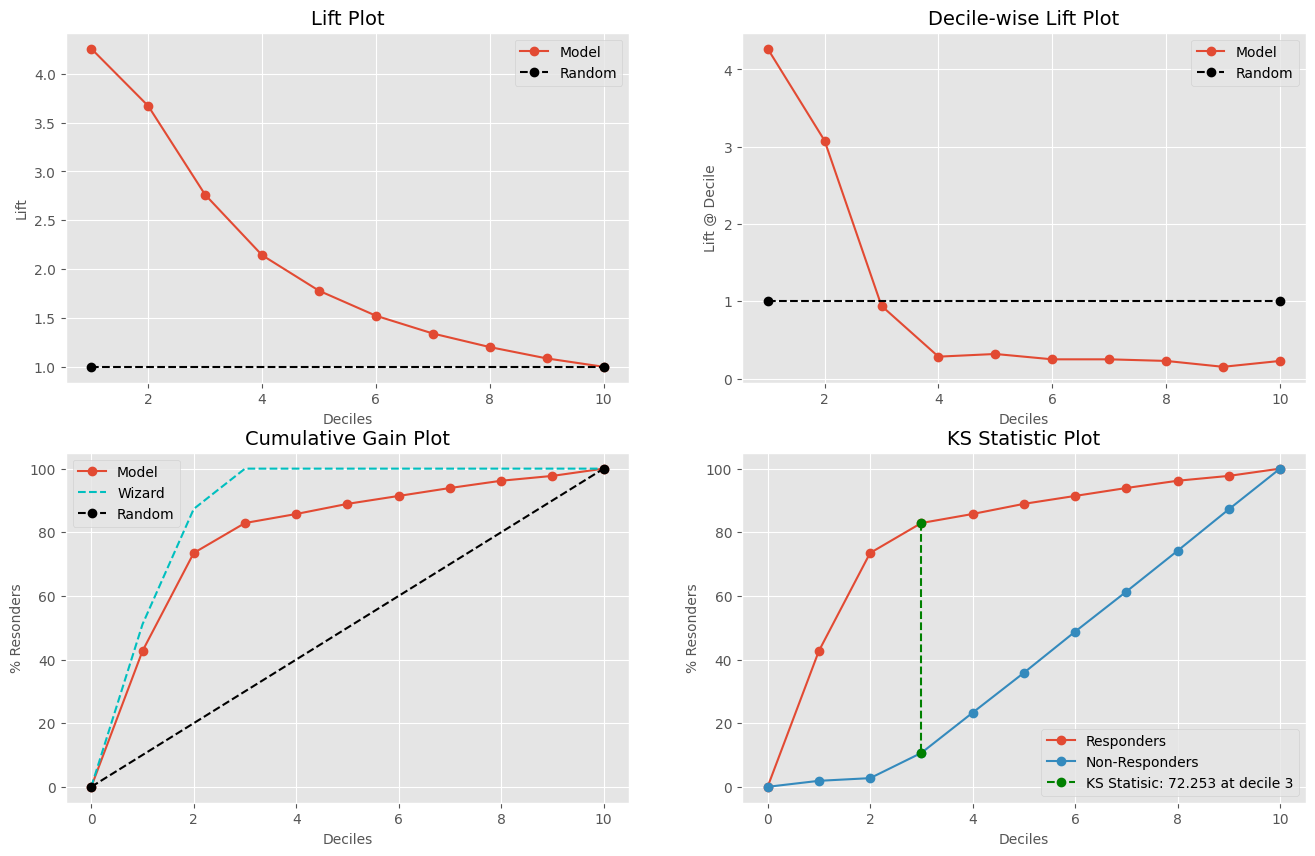

In [ ]:
# cetrics report using kds.metrics.report
# Below visuals include a lift plot. A positive sign is a line above that of random. In this case it is clearly above the line which is great.
metrics.report(y_test, predictions_rf, plot_style='ggplot')

## **Logistic Regression CV**

### Create + Fit Model

In [ ]:
# LogisticRegressionCV with L2 penalty (solver='lbfgs', cv=5, max_iter=500):
lr_CV = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=500)
lr_CV.fit(X_train_over, y_train_over)

# Print intercept and coefficients:
print('intercept ', lr_CV.intercept_)
print(pd.DataFrame({'coeff': lr_CV.coef_[0]}, index=X.columns))

intercept  [ 0.60000543 -0.2472558   0.26371067 -0.61646031]
                        coeff
age                  0.205211
sex                  0.071698
on_thyroxine         0.204008
query_on_thyroxine  -0.009776
on_antithyroid_meds -0.042453
sick                -0.018108
pregnant            -0.032739
thyroid_surgery      0.292597
I131_treatment      -0.003913
lithium              0.137328
goitre               0.083269
tumor               -0.055874
hypopituitary       -0.056385
psych                0.274602
TSH                 -3.603975
T3                   0.302623
TT4                 -0.103286
T4U                 -0.064596
FTI                 -0.540056


### Obtain Predictions with Model

In [ ]:

# Predictions on validation set:
lr_CV_pred = lr_CV.predict(X_valid_std)

lrCV_pred_result = pd.DataFrame({'Predicted': lr_CV_pred, 'Actual': y_valid})
display(lrCV_pred_result.head())

# Confusion matrix:
display(pd.crosstab(y_valid, lr_CV_pred, rownames=['True'], colnames=['Predicted'], margins=True))

# Classification report:
print(classification_report(y_valid,lr_CV_pred))

,Predicted,Actual
8926,0,0
8937,0,0
6779,0,0
1281,2,0
7036,1,1


Predicted,0,1,2,3,All
True,,,,,
0,1320,212,234,270,2036
1,13,164,5,19,201
2,43,21,247,23,334
3,26,12,3,140,181
All,1402,409,489,452,2752


              precision    recall  f1-score   support

           0       0.94      0.65      0.77      2036
           1       0.40      0.82      0.54       201
           2       0.51      0.74      0.60       334
           3       0.31      0.77      0.44       181

    accuracy                           0.68      2752
   macro avg       0.54      0.74      0.59      2752
weighted avg       0.81      0.68      0.71      2752



### Create Metrics Report

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.608,1.000,0.799,276.0,169.0,121.0,141.2,733,61.232,276.0,169.0,733,121.0,10.029,11.969,51.912,5.943,6.026,1.193
1,2,0.253,0.607,0.425,275.0,163.0,192.0,141.2,514,59.273,551.0,332.0,1247,313.0,20.022,23.513,88.314,15.373,8.140,1.174
2,3,0.132,0.253,0.184,275.0,121.0,218.0,141.2,165,44.000,826.0,453.0,1412,531.0,30.015,32.082,100.000,26.081,6.001,1.069
3,4,0.090,0.131,0.108,275.0,84.0,236.0,141.2,0,30.545,1101.0,537.0,1412,767.0,40.007,38.031,100.000,37.672,0.359,0.951
4,5,0.066,0.090,0.076,275.0,68.0,242.0,141.2,0,24.727,1376.0,605.0,1412,1009.0,50.000,42.847,100.000,49.558,-6.711,0.857
5,6,0.050,0.066,0.058,276.0,68.0,242.0,141.2,0,24.638,1652.0,673.0,1412,1251.0,60.029,47.663,100.000,61.444,-13.781,0.794
6,7,0.036,0.050,0.043,275.0,49.0,252.0,141.2,0,17.818,1927.0,722.0,1412,1503.0,70.022,51.133,100.000,73.821,-22.688,0.730
7,8,0.022,0.036,0.029,275.0,123.0,222.0,141.2,0,44.727,2202.0,845.0,1412,1725.0,80.015,59.844,100.000,84.725,-24.881,0.748
8,9,0.006,0.022,0.014,275.0,316.0,149.0,141.2,0,114.909,2477.0,1161.0,1412,1874.0,90.007,82.224,100.000,92.043,-9.819,0.914
9,10,0.000,0.006,0.001,275.0,251.0,162.0,141.2,0,91.273,2752.0,1412.0,1412,2036.0,100.000,100.000,100.000,100.000,0.000,1.000


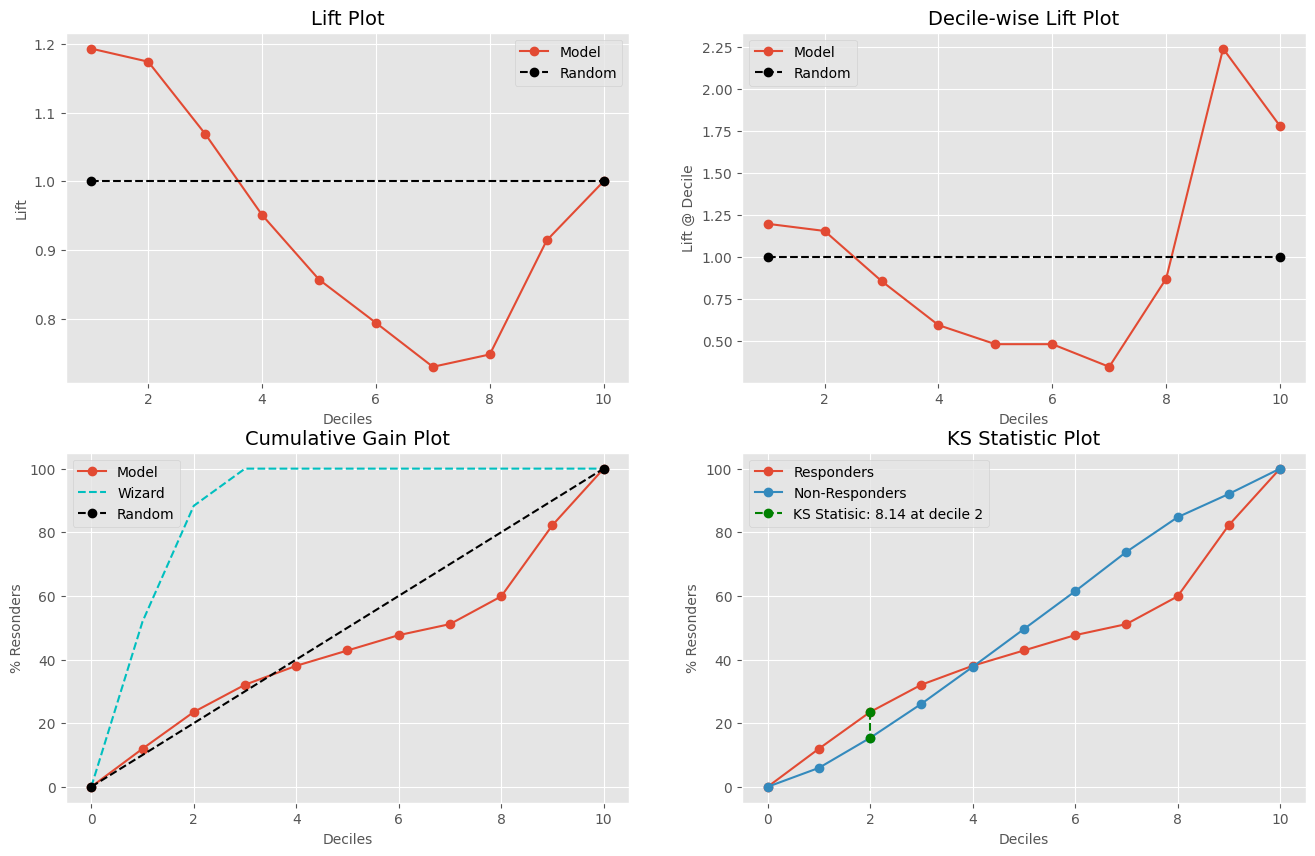

In [ ]:
# Metrics Report:
lr_CV_prob = lr_CV.predict_proba(X_valid_std)

kds.metrics.report(y_valid,lr_CV_prob[:,1],plot_style='ggplot')

## **Neural Network**

### Create + Compile Model

In [ ]:
# set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# define number of classess for model
num_classes = 4

# define the neural network model
NN_model = Sequential()
NN_model.add(Dense(64, activation='relu', input_shape=(X_train_over.shape[1],)))
NN_model.add(Dense(32, activation='relu'))
NN_model.add(Dense(16, activation='relu'))
NN_model.add(Dense(8, activation='relu'))
NN_model.add(Dense(4, activation='relu'))
NN_model.add(Dense(num_classes, activation='softmax'))

# Print model architecture
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1280      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4)                 36        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
Total params: 4080 (15.94 KB)
Trainable params: 4080 (

In [ ]:
# compile the model
NN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Encode target labels to one-hot format
y_train_encoded = to_categorical(y_train_over, num_classes)
y_valid_encoded = to_categorical(y_valid, num_classes)

### Train Model

In [ ]:
# define early stopping criteria to avoid overfitting
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
# train the model with 10 epochs (iterations)
history = NN_model.fit(X_train_over, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_valid_std, y_valid_encoded),callbacks=[early_stopping])

Epoch 1/100
340/340 [==============================] - 3s 3ms/step - loss: 0.9393 - accuracy: 0.6138 - val_loss: 1.0839 - val_accuracy: 0.4084
Epoch 2/100
340/340 [==============================] - 1s 2ms/step - loss: 0.6737 - accuracy: 0.7398 - val_loss: 0.9492 - val_accuracy: 0.5810
Epoch 3/100
340/340 [==============================] - 1s 2ms/step - loss: 0.5273 - accuracy: 0.8090 - val_loss: 0.7454 - val_accuracy: 0.6919
Epoch 4/100
340/340 [==============================] - 1s 2ms/step - loss: 0.4190 - accuracy: 0.8569 - val_loss: 0.6358 - val_accuracy: 0.7638
Epoch 5/100
340/340 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.8822 - val_loss: 0.5743 - val_accuracy: 0.7958
Epoch 6/100
340/340 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.9026 - val_loss: 0.6447 - val_accuracy: 0.7598
Epoch 7/100
340/340 [==============================] - 1s 3ms/step - loss: 0.2747 - accuracy: 0.9065 - val_loss: 0.6621 - val_accuracy: 0.7504

### Obtain Predictions + Evaluate Model

In [ ]:
# make predictions on validation data
y_pred = NN_model.predict(X_valid_std)

# convert predictions to class labels (use argmax for multiclass classification)
y_pred_labels = y_pred.argmax(axis=1)

86/86 [==============================] - 0s 4ms/step


In [ ]:
# generate classification report
report = classification_report(y_valid, y_pred_labels, target_names=["Class 0", "Class 1", "Class 2", "Class 3"])
print(report)

              precision    recall  f1-score   support

     Class 0       0.95      0.80      0.87      2036
     Class 1       0.56      0.79      0.65       201
     Class 2       0.53      0.77      0.63       334
     Class 3       0.54      0.79      0.64       181

    accuracy                           0.80      2752
   macro avg       0.65      0.79      0.70      2752
weighted avg       0.84      0.80      0.81      2752



86/86 [==============================] - 0s 4ms/step
LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of perc

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.464,1.000,0.814,276.0,248.0,85.0,141.2,733,89.855,276.0,248.0,733,85.0,10.029,17.564,51.912,4.175,13.389,1.751
1,2,0.099,0.463,0.239,275.0,146.0,195.0,141.2,514,53.091,551.0,394.0,1247,280.0,20.022,27.904,88.314,13.752,14.152,1.394
2,3,0.034,0.097,0.060,275.0,89.0,235.0,141.2,165,32.364,826.0,483.0,1412,515.0,30.015,34.207,100.000,25.295,8.912,1.140
3,4,0.014,0.034,0.022,275.0,57.0,248.0,141.2,0,20.727,1101.0,540.0,1412,763.0,40.007,38.244,100.000,37.475,0.769,0.956
4,5,0.006,0.014,0.009,275.0,110.0,230.0,141.2,0,40.000,1376.0,650.0,1412,993.0,50.000,46.034,100.000,48.772,-2.738,0.921
5,6,0.003,0.006,0.004,276.0,80.0,242.0,141.2,0,28.986,1652.0,730.0,1412,1235.0,60.029,51.700,100.000,60.658,-8.958,0.861
6,7,0.001,0.003,0.002,275.0,94.0,234.0,141.2,0,34.182,1927.0,824.0,1412,1469.0,70.022,58.357,100.000,72.151,-13.794,0.833
7,8,0.000,0.001,0.001,275.0,98.0,234.0,141.2,0,35.636,2202.0,922.0,1412,1703.0,80.015,65.297,100.000,83.644,-18.347,0.816
8,9,0.000,0.000,0.000,275.0,116.0,227.0,141.2,0,42.182,2477.0,1038.0,1412,1930.0,90.007,73.513,100.000,94.794,-21.281,0.817
9,10,0.000,0.000,0.000,275.0,374.0,106.0,141.2,0,136.000,2752.0,1412.0,1412,2036.0,100.000,100.000,100.000,100.000,0.000,1.000


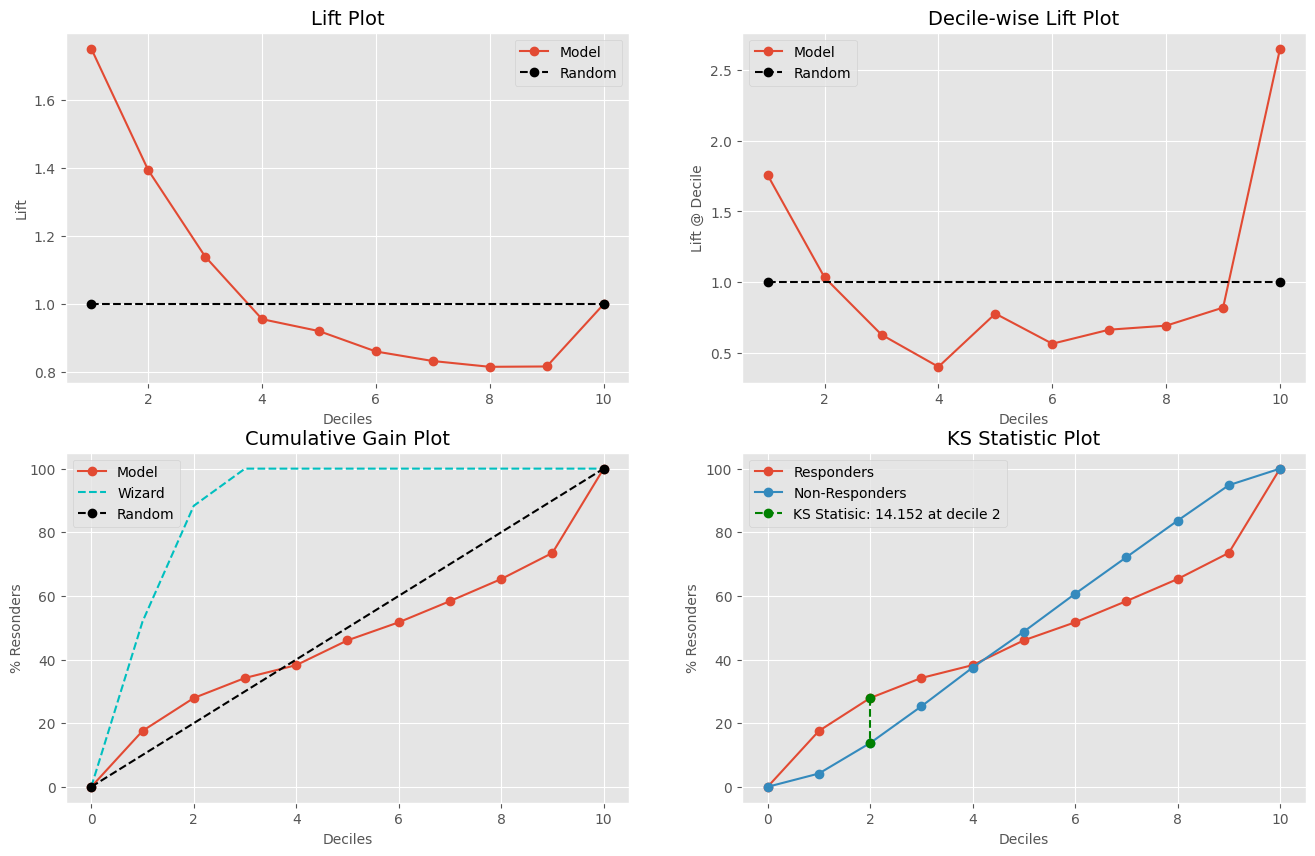

In [ ]:
# calculate probabilities using the model
y_valid_prob = NN_model.predict(X_valid_std)

# cetrics report using kds.metrics.report
metrics.report(y_valid, y_valid_prob[:, 1], plot_style='ggplot')

## **Ensemble Method**

In [ ]:
# target models for ensemble
lr_pred = lr_CV.predict(X_test)
nn_pred = NN_model.predict(X_test)
y_pred_labels2 = nn_pred.argmax(axis=1)
stacked_predictions = numpy.column_stack((predictions_rf, lr_pred, y_pred_labels2))

86/86 [==============================] - 0s 2ms/step


In [ ]:
# Split the stacked predictions for meta-model training and validation
X_train_meta, X_val_meta, y_train_meta, y_val_meta = train_test_split(stacked_predictions, y_test, test_size=0.2, random_state=42)

# train ensemble model
meta_model = LogisticRegression()
meta_model.fit(X_train_meta, y_train_meta)

meta_pred = meta_model.predict(X_val_meta)

# measure accuracy
meta_model_score = meta_model.score(X_val_meta, y_val_meta)
print(f"Meta-model accuracy: {meta_model_score:.4f}")

#accuracy_score(y_val_meta, meta_pred)
classification_report(y_val_meta, meta_pred)

Meta-model accuracy: 0.8566


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.86      0.97      0.91       403\n           1       0.00      0.00      0.00        48\n           2       0.82      0.80      0.81        64\n           3       0.84      0.89      0.86        36\n\n    accuracy                           0.86       551\n   macro avg       0.63      0.66      0.65       551\nweighted avg       0.78      0.86      0.82       551\n'

### Table

In [ ]:
metrics_dict = {
    "Random Forest": [accuracy_score(y_test, predictions_rf)],#, precision_score(y_test, predictions_rf), recall_score(y_test, predictions_rf), f1_score(y_test, predictions_rf)],
    "Logistic": [accuracy_score(y_valid,lr_CV_pred)],#, precision_score(y_test, y_pred_log), recall_score(y_test, y_pred_log), f1_score(y_test, y_pred_log)],
    "Neural Network": [accuracy_score(y_valid, y_pred_labels)],#, precision_score(y_test, y_pred_nn), recall_score(y_test, y_pred_nn), f1_score(y_test, y_pred_nn)],
    "Ensemble Method": [accuracy_score(y_val_meta, meta_pred)]#, precision_score(y_test, ensemble_predictions), recall_score(y_test, ensemble_predictions), f1_score(y_test, ensemble_predictions)],
}
# Create DataFrame from dictionary
df = pd.DataFrame.from_dict(metrics_dict, orient='index', columns=['Accuracy'])
df = df.round(3)
print(df)

                 Accuracy
Random Forest       0.919
Logistic            0.680
Neural Network      0.796
Ensemble Method     0.857


# **Conclusion**

### **Summary for Each Individual Model**

## **Random Forest**

Overall the data suggests that random forest is a great performing model to use for diagnosis of thyroid conditions - in fact it is the best. It received scores of 0.92 for both accuracy and recall, and was the highest performing model of the three. It even outperformed the ensemble model it is included in. It might be fair to assume that the other two models lower the predictive capacity of the model. The lift chart hovers above the line for random chance through the whole duration, which is a great sign.

## **Logistic Regression**




For logistic regression cross-validation, the overall result had a low accuracy score at 68%. Precision was high at predicting healthy target instances at 94%. However, precision on predicting hyperthyroidism, hyperthyroidism, and others were all less than 48% in spite of balancing the target classes. Looking at the metrics report, the first 10% delivers 1.2x lift and a steep decline thereafter. Gains are relatively close to the baseline up to 30% of the population and a loss in response after 4 deciles. All these suggest that logistic regression cross-validation is a poor performing model to use for diagnosis of thyroid conditions based on presence of analytes.

## **Neural Network**

Targeting the 4 target classes, a sequential Neural Network model was created with a total of 6 layers. Of the 6 layers, 5 of them are hidden layers. Each hidden layer is comprised of different number of neurons: layer 1 = 64, layer 2 = 32, layer 3 = 16, layer 4 = 8, and layer 5 = 4. Using encoded predictor variables, the model is given 'early stopping' criteria to ensure that the optimal number of epochs (i.e., iterations) is used.

The resulting classification report indicates that the Neural Network model performed very well with a 70% accuracy rate. Additionally, precision, recall, and F1 scores across the 4 classess are signifcant as well.

A lift curve and a cummulative gain curve also confirm significant performance for the model. The lift curve begins at a high value of ~1.6 and illustrates a step decline thereafter for the next 5 deciles. In turn, this confirms that, compared to a random model, the sequential Neural Network model performs optimally. Though, its performance begins to deminish after the 5 decile. The cummulative gain curve confirms a similar output, illustrating a curve that begins at the bottom-left value of 0 (zero) and quickly rises to 100 within the next 2 deciles-- it is at decile number 3 that the model performs optimally.

## **Ensemble**

The ensemble method scored a .86 which was the second highest performing model. The advantage of this model over the random forest is it has greater protection from over fitting which random Forests are prone to do. This ensemble method essentially trains a new model on the predictions of the other models against the actual results. This new model learns how to take the advice from the three models and make the best prediction possible. This ensemble is a model trained on the predictions of a few individual models trained on the actual data.

### **Conclusion Summary**

To summarize. We used both exploratory data analysis and a host of tools within the data preprocessing toolkit to create a final data frame that would deliver the best performing models. We dropped highly correlated columns, meaningless columns, and redundant information. We transformed data to mitigate the problems of different scales across features. We transformed the datatypes of the boolean features without losing information.

Using this final data frame, the three models were made. Cross validation was used to determine and set the optimal hyperparameters. These models were combined into a fourth ensemble model and then their performances were compared.
The top performing model was the random forest model. It is important to understand the underlying data and ensure to compare the performances of many different types of models. The model-to-data type relationship is so important. In this case the random forest model drastically outperformed the others.
One of the next steps will be to train a model that can be completely trained using information a person will have themselves at home. This could involve using the query information we dropped to see if there is predictive capacity there, or it could mean finding other data features that won't require testing like the hormone level data we used.
